In [4]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab

jew=pd.read_csv('Ювелирный магазин.csv')
jew.head(5)

,date,Variant,cnt(addToCart),sum(addToCartItems)
0,2019-09-01,90,56,110247
1,2019-09-01,10,52,163098
2,2019-09-02,10,59,93317
3,2019-09-02,90,56,26457
4,2019-09-03,90,54,56418


In [5]:
jew ['date']=jew ['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [6]:
# посмотрим среднее значение количества добавлений в корзину и суммы товаров по вариантам
jew.groupby('Variant').mean()

,cnt(addToCart),sum(addToCartItems)
Variant,,
10,47.8,38352.88
90,47.2,40602.12


по количеству добавлений в обоих вариантах разницы нет, по средней сумме добавлений лидирует вариант 90 (таблица размеров).

In [16]:
# посмотрим значение конверсии из количества добавлений в сумму товаров
a=jew.groupby(['Variant','date']).agg({'cnt(addToCart)':'sum','sum(addToCartItems)':'sum'})
c=a.groupby('Variant').cumsum().reset_index()
c['conversion']=c.loc[:,'cnt(addToCart)']/c.loc[:,'sum(addToCartItems)']
c=c.set_index('date')
c.head(5)

,Variant,cnt(addToCart),sum(addToCartItems),conversion
date,,,,
2019-09-01,10,52,163098,0.000319
2019-09-02,10,111,256415,0.000433
2019-09-03,10,157,273400,0.000574
2019-09-04,10,203,304552,0.000667
2019-09-05,10,285,336858,0.000846


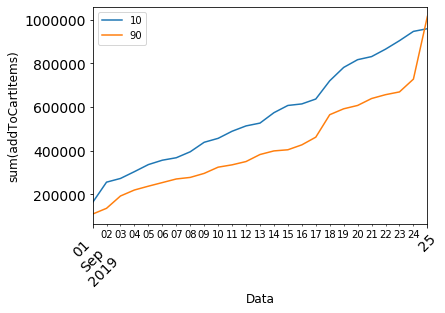

In [13]:
# построим график суммы добавленных товаров по вариантам
A=c.query("Variant==10")['sum(addToCartItems)']
B=c.query("Variant==90")['sum(addToCartItems)']

A.plot(label = '10')
B.plot(label = '90')
plt.xticks(fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Data",fontsize=12)
plt.ylabel("sum(addToCartItems)",fontsize=12)
plt.legend(['10','90'])

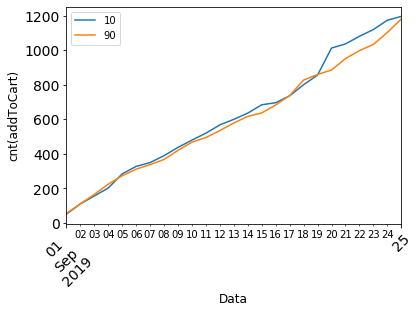

In [14]:
# построим график количества добавленных товаров по вариантам
A=c.query("Variant==10")['cnt(addToCart)']
B=c.query("Variant==90")['cnt(addToCart)']

A.plot(label = '10')
B.plot(label = '90')
plt.xticks(fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Data",fontsize=12)
plt.ylabel("cnt(addToCart)",fontsize=12)
plt.legend(['10','90'])

из графиков также видно,что количество добавлений в обоих вариантах одинаковое, по сумме добавлений в конце теста начал лидировать вариант 90 (таблица размеров).

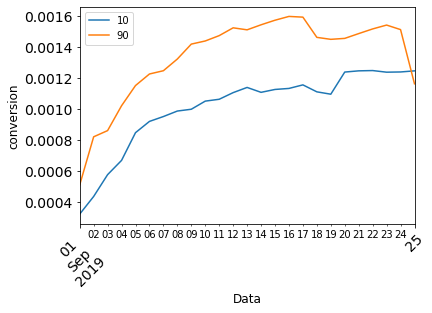

In [10]:
# построим график конверсии
A=c.query("Variant==10")['conversion']
B=c.query("Variant==90")['conversion']

A.plot(label = '10')
B.plot(label = '90')
plt.xticks(fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Data",fontsize=12)
plt.ylabel("conversion",fontsize=12)
plt.legend(['10','90'])

In [24]:
print (c[c['Variant']==10].conversion.tail(5))
print ()
print (c[c['Variant']==90].conversion.tail(5))

date
2019-09-21    0.001246
2019-09-22    0.001248
2019-09-23    0.001238
2019-09-24    0.001239
2019-09-25    0.001246
Name: conversion, dtype: float64

date
2019-09-21    0.001488
2019-09-22    0.001518
2019-09-23    0.001543
2019-09-24    0.001514
2019-09-25    0.001163
Name: conversion, dtype: float64


по графику конверсии видно: конверсия у теста А меньше,незначительно растет, у теста Б конверсия больше, растет быстрее, но резко падает к концу теста.
Изменение конверсии можно объяснить резким ростом суммы добавленных товаров в последние дни варианта Б (таблица размеров).

Text(0, 0.5, 'p-value, логарифм. шкала')

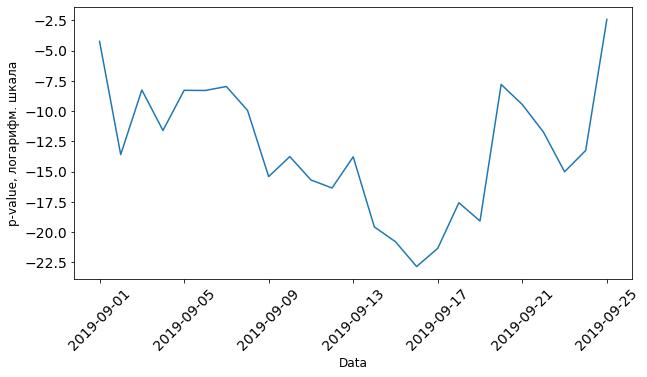

In [108]:
# построим график p-value
from statsmodels.stats.proportion import proportions_ztest

new_ar=[]
for i in range(len(c[c['Variant']==10])):
    count = np.array([c[c['Variant']==10]['cnt(addToCart)'][i], c[c['Variant']==90]['cnt(addToCart)'][i]])
    nobs = np.array([c[c['Variant']==10]['sum(addToCartItems)'][i], c[c['Variant']==90]['sum(addToCartItems)'][i]])
    stat, pval = proportions_ztest(count, nobs)
    new_ar.append(pval)
    
p_value = pd.DataFrame(new_ar)
p_value = p_value.rename(columns={0: "p_val"})
p_value['date'] = c[c['Variant']==10].index

p_value = p_value.set_index('date')


fig, ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(np.log(p_value.p_val))
plt.xticks(fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Data",fontsize=12)
plt.ylabel("p-value, логарифм. шкала",fontsize=12)

p-value не превышает уровня значимости 0.05, изменения статистически значимы на уровне значимости 0.05 на имеющихся данных.

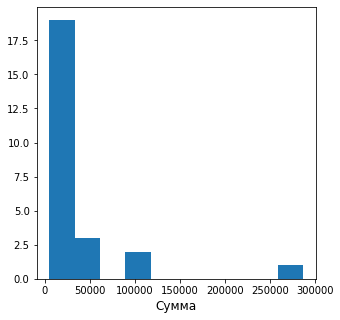

In [66]:
# посмотрим на распределение cуммы
fig, ax = plt.subplots(1,1,figsize = (5,5))
ax.hist(a.loc[90]['sum(addToCartItems)'])
plt.xlabel("Сумма",fontsize=12)
plt.show()

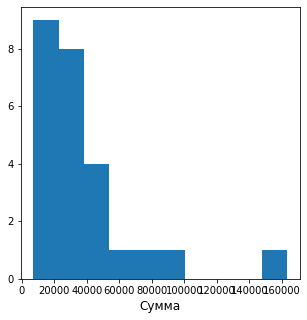

In [67]:
fig, ax = plt.subplots(1,1,figsize = (5,5))
ax.hist(a.loc[10]['sum(addToCartItems)'])
plt.xlabel("Сумма",fontsize=12)
plt.show()

In [47]:
jew.groupby(['Variant'])['sum(addToCartItems)'].describe()

,count,mean,std,min,25%,50%,75%,max
Variant,,,,,,,,
10,25.0,38352.88,33448.994095,7048.0,18025.0,32306.0,42514.0,163098.0
90,25.0,40602.12,57678.076016,5191.0,16466.0,22530.0,32116.0,286956.0


так как распределение не равномерно используем бутстрэп для метрики 'сумма'.

In [29]:
def bootstrap(arr,n=100,N_TRIAL = 1000,func = np.mean):
    res = []
    n = min(len(arr),n)
    # Инициализируем цикл попыток
    for _ in range(N_TRIAL):
        # Делаем подвыборку размера n
        if len(arr.shape)>1:
            ind = np.random.choice(np.arange(arr.shape[0]), size = (n,))
            subsample = arr.iloc[ind]
        else:
            subsample = np.random.choice(arr, size = (n,))
        # рассчитываем статистику
        stat = func(subsample)
        res.append(stat)
    return res # shape (N_TRIAL,)

In [33]:
samples_10 = bootstrap(a.query("Variant==10")['sum(addToCartItems)'],N_TRIAL = 3000)
samples_90 = bootstrap(a.query("Variant==90")['sum(addToCartItems)'],N_TRIAL = 3000)

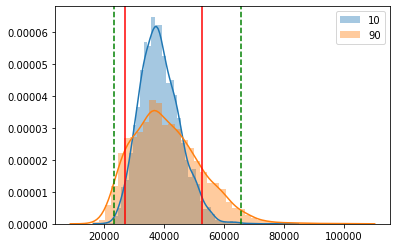

In [34]:
ax = sns.distplot(samples_10,label = '10')
sns.distplot(samples_90,ax = ax,label = '90')
ax.legend(['10','90'])
ax.axvline(np.percentile(samples_10,2.5),linestyle = '-',color='r')
ax.axvline(np.percentile(samples_10,97.5),linestyle = '-',color='r')

ax.axvline(np.percentile(samples_90,2.5),linestyle = '--',color='g')
ax.axvline(np.percentile(samples_90,97.5),linestyle = '--',color='g')

Доверительные интервалы пересекаются,нельзя сказать,что варианты различаются.

In [43]:
buf = []
for i in range(2000):
    a_sample =  a.query("Variant==10")['sum(addToCartItems)'].sample(20)
    b_sample =  a.query("Variant==90")['sum(addToCartItems)'].sample(20)
    buf.append(np.mean(b_sample)-np.mean(a_sample))

min = -12061.975000000002 max = 13226.8175


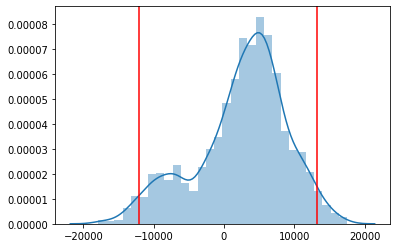

In [44]:
ax_buf = sns.distplot(buf)
ax_buf.axvline(np.percentile(buf,2.5),linestyle = '-',color='r')
ax_buf.axvline(np.percentile(buf,97.5),linestyle = '-',color='r')
print('min =',np.percentile(buf,2.5),'max =',np.percentile(buf,97.5))

Распределение включает в себя 0, разница между вариантами отсутствует.

ВЫВОД:

 - значимых различий между вариантами нет.
 - при анализе данных ориентирировались на сумму добавленных товаров, т.к. она влияет на конверсию в большей степени.
 - среднее количество добавленных товаров в обоих вариантах одинаково, среднее значение суммы добавленных товаро больше в вариеанте с таблицей размеров (Б).
 - в последний день теста в варианте Б присутствует большая сумма добавленных товаров за 1 день,что сильно повлияло на результаты рассматриваемого периода, так как в течение теста вариант А был предподчительней.